In [802]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

from prophet import Prophet

### Total population

In [803]:
population = pd.read_csv('population.csv')
population.columns = (["population"])
index = pd.date_range(start = '1950', end = '2020', freq = "YS")
population.index = index
population

,population
1950-01-01,2536431
1951-01-01,2584034
1952-01-01,2630862
1953-01-01,2677609
1954-01-01,2724847
...,...
2016-01-01,7464022
2017-01-01,7547859
2018-01-01,7631091
2019-01-01,7713468


### Flat yearly change

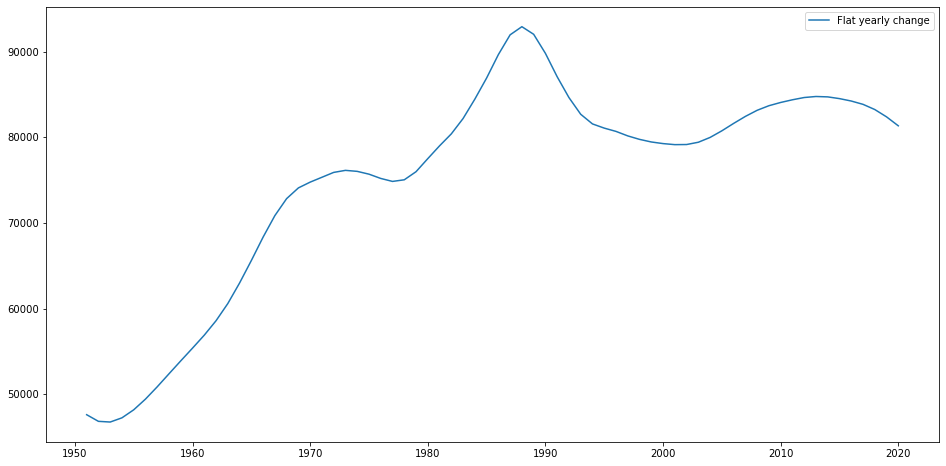

In [804]:
plt.rc("figure", figsize = (16, 8))
population['Yearly change'] = population['population'].diff()
plt.plot(population['Yearly change'])
plt.legend(['Flat yearly change'])

### % yearly change

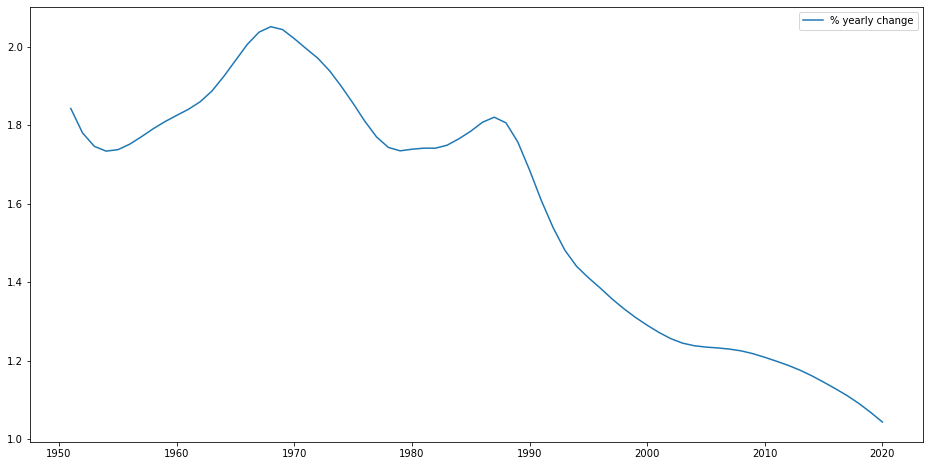

In [805]:
population['%'] = population['Yearly change'] / population['population'] * 100
plt.plot(population['%'])
plt.legend(['% yearly change'])

### Birth and death rate

In [806]:
#births
change = pd.read_csv('birth_rate.csv')
index = pd.date_range(start = '1950', end = '2020', freq = "YS")
change.index = index
population['births'] = change

#deaths
deaths = pd.read_csv('death_rate.csv')
deaths.index = index

population['deaths'] = deaths

population

,population,Yearly change,%,births,deaths
1950-01-01,2536431,NaN,NaN,36.900000,19.100000
1951-01-01,2584034,47603.0,1.842197,36.900000,19.100000
1952-01-01,2630862,46828.0,1.779949,36.900000,19.100000
1953-01-01,2677609,46747.0,1.745849,36.900000,19.100000
1954-01-01,2724847,47238.0,1.733602,36.900000,19.100000
...,...,...,...,...,...
2016-01-01,7464022,84225.0,1.128413,19.071017,7.534669
2017-01-01,7547859,83837.0,1.110739,18.665347,7.531579
2018-01-01,7631091,83232.0,1.090696,18.148811,7.526633
2019-01-01,7713468,82377.0,1.067963,17.878294,7.502523


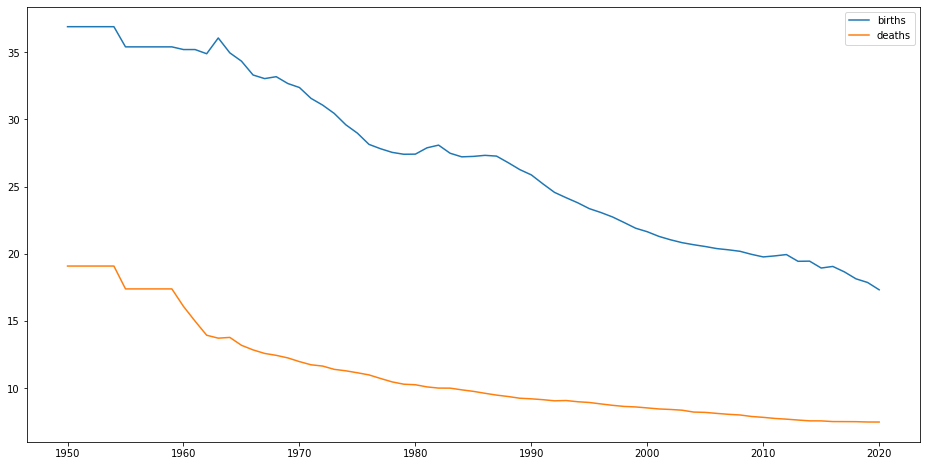

In [807]:
plt.plot(population['births'])
plt.plot(population['deaths'])
plt.legend(['births', 'deaths'])

### Life expectancy

In [808]:
expectancy = pd.read_csv('life_expectancy.csv')
expectancy.index = index

population['life_expectancy'] = expectancy
population

,population,Yearly change,%,births,deaths,life_expectancy
1950-01-01,2536431,NaN,NaN,36.900000,19.100000,46.960000
1951-01-01,2584034,47603.0,1.842197,36.900000,19.100000,46.960000
1952-01-01,2630862,46828.0,1.779949,36.900000,19.100000,46.960000
1953-01-01,2677609,46747.0,1.745849,36.900000,19.100000,46.960000
1954-01-01,2724847,47238.0,1.733602,36.900000,19.100000,46.960000
...,...,...,...,...,...,...
2016-01-01,7464022,84225.0,1.128413,19.071017,7.534669,72.186101
2017-01-01,7547859,83837.0,1.110739,18.665347,7.531579,72.391406
2018-01-01,7631091,83232.0,1.090696,18.148811,7.526633,72.573980
2019-01-01,7713468,82377.0,1.067963,17.878294,7.502523,72.762667


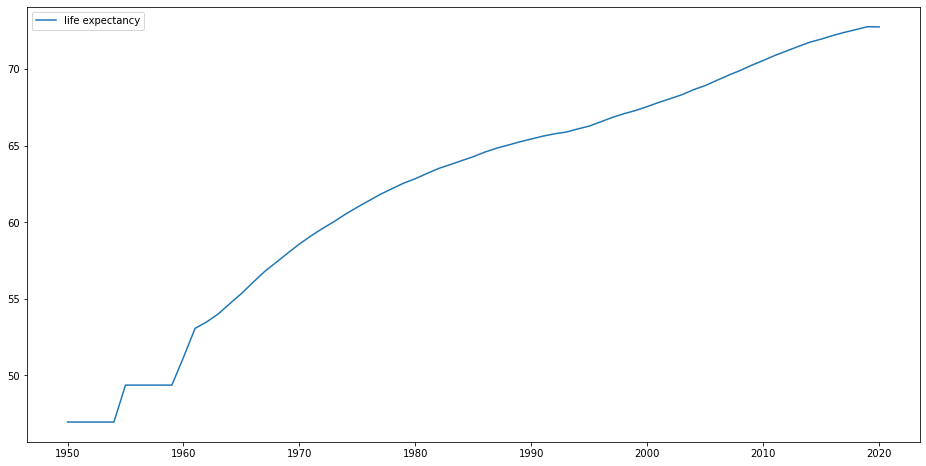

In [809]:
plt.plot(population['life_expectancy'])
plt.legend(['life expectancy'])

### Previous predictions

In [810]:
#high variant
variants = pd.read_csv('high_variant.csv')

#medium variant
variants['medium'] = pd.read_csv('medium_variant.csv')

#low variant
variants['low'] = pd.read_csv('low_variant.csv')

#index
index = pd.date_range(start = '2020', end = '2100', freq = "YS")
variants.index = index
variants

,high,medium,low
2020-01-01,7794799,7794799,7794799
2021-01-01,7883802,7874966,7865624
2022-01-01,7974797,7953953,7932536
2023-01-01,8067252,8031800,7995991
2024-01-01,8160745,8108605,8056356
...,...,...,...
2096-01-01,15164532,10858112,7549519
2097-01-01,15273554,10863615,7493601
2098-01-01,15382613,10868348,7437040
2099-01-01,15491594,10872284,7379869


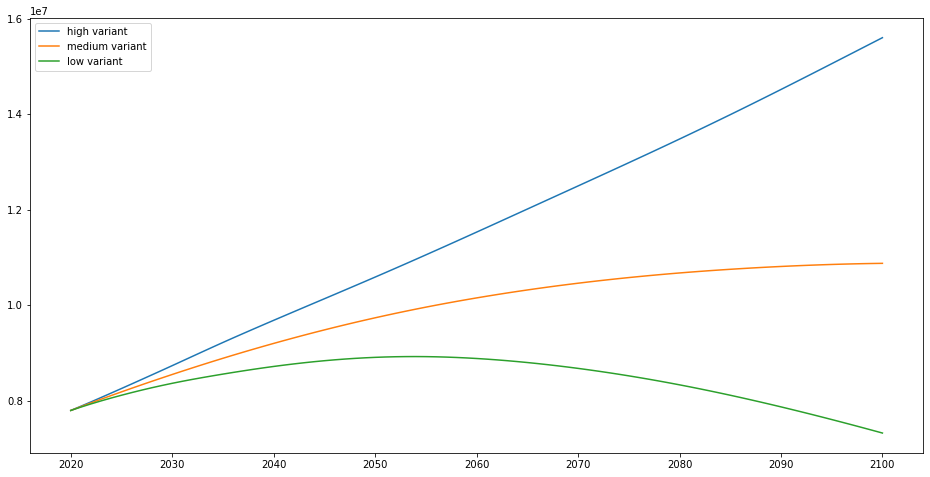

In [811]:
plt.plot(variants['high'])
plt.plot(variants['medium'])
plt.plot(variants['low'])
plt.legend(['high variant', 'medium variant', 'low variant'])

### ARIMA

In [812]:
auto_arima(population['population'].dropna(), seasonal = False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1182.100, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1188.550, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1183.379, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1190.157, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.387 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -589.050
Date:                Tue, 31 May 2022   AIC                           1182.100
Time:                        18:47:07   BIC                           1186.568
Sample:                             0   HQIC                          1183.873
                                 - 71                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    488.8116    150.816      3.241      0.001     193.218     784.405
sigma2      1.523e+06   2.71e+05      5.622      0.000    9.92e+05    2.05e+06
===================================================================================
Ljung-Box (L1) (Q):                  60.13   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.00   Prob(JB):                         0.71
Heteroskedasticity (H):               0.33   Skew:                            -0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [813]:
fitSARIMA1 = SARIMAX(population['population'], order = (2, 2, 2)).fit()
fitSARIMA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             population   No. Observations:                   71
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -588.445
Date:                Tue, 31 May 2022   AIC                           1186.891
Time:                        18:47:07   BIC                           1198.061
Sample:                    01-01-1950   HQIC                          1191.322
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9464      3.118      0.304      0.761      -5.164       7.057
ar.L2          0.0506      3.114      0.016      0.987      -6.053       6.154
ma.L1         -0.9479      2.940     -0.322      0.747      -6.711       4.815
ma.L2         -0.0520      3.058     -0.017      0.986      -6.046       5.942
sigma2      1.215e+06   7.24e-05   1.68e+10      0.000    1.21e+06    1.21e+06
===================================================================================
Ljung-Box (L1) (Q):                  60.57   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.00   Prob(JB):                         0.65
Heteroskedasticity (H):               0.48   Skew:                            -0.27
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.24e+25. Standard errors may be unstable.
"""

##### (2, 2, 2) is better

In [814]:
auto_arima(population['Yearly change'].dropna(), seasonal = False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1029.920, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1028.280, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1028.595, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1027.925, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1030.173, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.291 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -512.963
Date:                Tue, 31 May 2022   AIC                           1027.925
Time:                        18:47:07   BIC                           1030.145
Sample:                             0   HQIC                          1028.805
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.086e+05   2.09e+04      9.999      0.000    1.68e+05     2.5e+05
===================================================================================
Ljung-Box (L1) (Q):                  43.19   Jarque-Bera (JB):                64.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -1.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [815]:
fitSARIMA2 = SARIMAX(population['Yearly change'], order = (2, 2, 2)).fit()
fitSARIMA2.summary()

c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Yearly change   No. Observations:                   71
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -626.746
Date:                Tue, 31 May 2022   AIC                           1263.492
Time:                        18:47:07   BIC                           1274.663
Sample:                    01-01-1950   HQIC                          1267.924
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1827      0.136      1.342      0.180      -0.084       0.449
ar.L2         -0.1092      0.061     -1.788      0.074      -0.229       0.010
ma.L1         -0.0007     13.517  -5.34e-05      1.000     -26.493      26.491
ma.L2         -0.9993      0.084    -11.963      0.000      -1.163      -0.836
sigma2      3.913e+06   3.45e-06   1.13e+12      0.000    3.91e+06    3.91e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.08   Jarque-Bera (JB):              1513.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -4.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.45e+29. Standard errors may be unstable.
"""

##### (2, 2, 2) better once again

In [816]:
auto_arima(population['%'].dropna(), seasonal = False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-546.507, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-301.743, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-429.272, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-382.491, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-291.605, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-543.457, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-541.567, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-541.424, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-542.274, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-490.179, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-529.456, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-535.094, Time=0.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-540.216, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-542.563, Time=0.14 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 279.254
Date:                Tue, 31 May 2022   AIC                           -546.507
Time:                        18:47:09   BIC                           -533.103
Sample:                             0   HQIC                          -541.189
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0022      0.001     -1.717      0.086      -0.005       0.000
ar.L1          1.5213      0.128     11.889      0.000       1.270       1.772
ar.L2         -0.6524      0.112     -5.802      0.000      -0.873      -0.432
ma.L1          0.9349      0.129      7.234      0.000       0.682       1.188
ma.L2          0.3472      0.161      2.152      0.031       0.031       0.663
sigma2      1.622e-05   2.82e-06      5.743      0.000    1.07e-05    2.18e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                 5.87
Prob(Q):                              0.27   Prob(JB):                         0.05
Heteroskedasticity (H):               0.10   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [817]:
train_data = population.iloc[:-10]
test_data = population.iloc[-10:]

In [818]:
#baseline predict
fitSARIMA1 = SARIMAX(train_data['population'], order = (2, 2, 2)).fit()
start = len(train_data)
end = start + len(test_data) - 1
fcastSARIMA1 = fitSARIMA1.predict(start = start, end = end, dynamic = False).rename('SARIMA 1')
print(mean_absolute_percentage_error(test_data['population'], fcastSARIMA1))

#predicting based on flat yearly increase
fitSARIMA2 = SARIMAX(train_data['Yearly change'], order = (2, 2, 2)).fit()
start = len(train_data)
end = start + len(test_data) - 1
fcastSARIMA2 = fitSARIMA2.predict(start = start, end = end, dynamic = False).rename('SARIMA 2')
print(mean_absolute_percentage_error(test_data['Yearly change'], fcastSARIMA2))

#predicting based on % yearly increase
fitSARIMA3 = SARIMAX(train_data['%'], order = (2, 1, 2)).fit()
start = len(train_data)
end = start + len(test_data) - 1
fcastSARIMA3 = fitSARIMA3.predict(start = start, end = end, dynamic = False).rename('SARIMA 3')
print(mean_absolute_percentage_error(test_data['%'], fcastSARIMA3))

#going back to total population
pred2 = np.array([fcastSARIMA2[0] + train_data['population'][-1]])
pred3 = np.array([(fcastSARIMA3[0] + 100) / 100 * train_data['population'][-1]])

for i in range(0, len(fcastSARIMA2) - 1):
    pred2 = np.append(pred2, pred2[i] + fcastSARIMA2[i + 1])
    pred3 = np.append(pred3, (fcastSARIMA3[i + 1] + 100) / 100 * pred3[i])

pred = pd.DataFrame()
pred['flat'] = pred2
pred['%'] = pred3
pred.index = pd.date_range(start = '2011', end = '2020', freq = 'YS')
pred['base'] = fcastSARIMA1
pred

0.001578444015021041
0.028389385025908563
0.04343262677252276


c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,flat,%,base
2011-01-01,7.041263e+06,7.040200e+06,7.041490e+06
2012-01-01,7.126080e+06,7.123950e+06,7.126764e+06
2013-01-01,7.211279e+06,7.208183e+06,7.212643e+06
2014-01-01,7.296858e+06,7.293032e+06,7.299125e+06
2015-01-01,7.382817e+06,7.378629e+06,7.386208e+06
2016-01-01,7.469156e+06,7.465092e+06,7.473891e+06
2017-01-01,7.555877e+06,7.552517e+06,7.562172e+06
2018-01-01,7.642976e+06,7.640976e+06,7.651048e+06
2019-01-01,7.730457e+06,7.730518e+06,7.740518e+06
2020-01-01,7.818317e+06,7.821173e+06,7.830580e+06


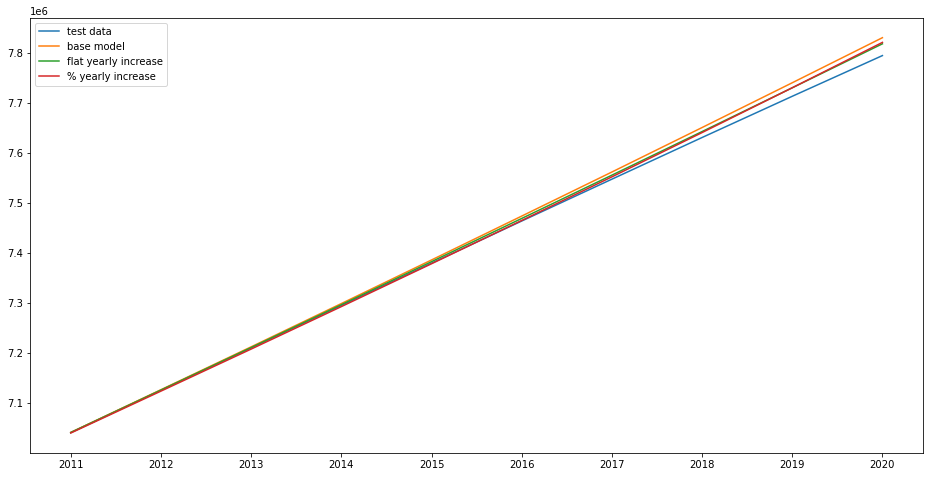

In [819]:
plt.plot(test_data['population'])
plt.plot(pred['base'])
plt.plot(pred['flat'])
plt.plot(pred['%'])
plt.legend(['test data', 'base model', 'flat yearly increase', '% yearly increase'])

### Looking at forecast into future

In [820]:
#baseline predict
fitSARIMA1 = SARIMAX(population['population'], order = (2, 2, 2)).fit()
start = len(population)
end = start + 79
fcastSARIMA1 = fitSARIMA1.predict(start = start, end = end, dynamic = False).rename('SARIMA 1')

#predicting based on flat yearly increase
fitSARIMA2 = SARIMAX(population['Yearly change'], order = (2, 2, 2)).fit()
fcastSARIMA2 = fitSARIMA2.predict(start = start, end = end, dynamic = False).rename('SARIMA 2')

#predicting based on % yearly increase
fitSARIMA3 = SARIMAX(population['%'], order = (2, 1, 2)).fit()
fcastSARIMA3 = fitSARIMA3.predict(start = start, end = end, dynamic = False).rename('SARIMA 3')

pred2 = np.array([fcastSARIMA2[0] + population['population'][-1]])
pred3 = np.array([(fcastSARIMA3[0] + 100) / 100 * population['population'][-1]])

#going back to total population
for i in range(0, len(fcastSARIMA2) - 1):
    pred2 = np.append(pred2, pred2[i] + fcastSARIMA2[i + 1])
    pred3 = np.append(pred3, (fcastSARIMA3[i + 1] + 100) / 100 * pred3[i])

future = pd.DataFrame()
future['flat'] = pred2
future['%'] = pred3
future.index = pd.date_range(start = '2021', end = '2100', freq = 'YS')
future['base'] = fcastSARIMA1
future

c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,flat,%,base
2021-01-01,7.876118e+06,7.874231e+06,7.876686e+06
2022-01-01,7.958463e+06,7.952756e+06,7.959128e+06
2023-01-01,8.041910e+06,8.030672e+06,8.042125e+06
2024-01-01,8.126362e+06,8.108336e+06,8.125675e+06
2025-01-01,8.211790e+06,8.186107e+06,8.209776e+06
...,...,...,...
2096-01-01,1.679867e+07,1.622864e+07,1.549691e+07
2097-01-01,1.695513e+07,1.638596e+07,1.561684e+07
2098-01-01,1.711258e+07,1.654480e+07,1.573722e+07
2099-01-01,1.727101e+07,1.670519e+07,1.585804e+07


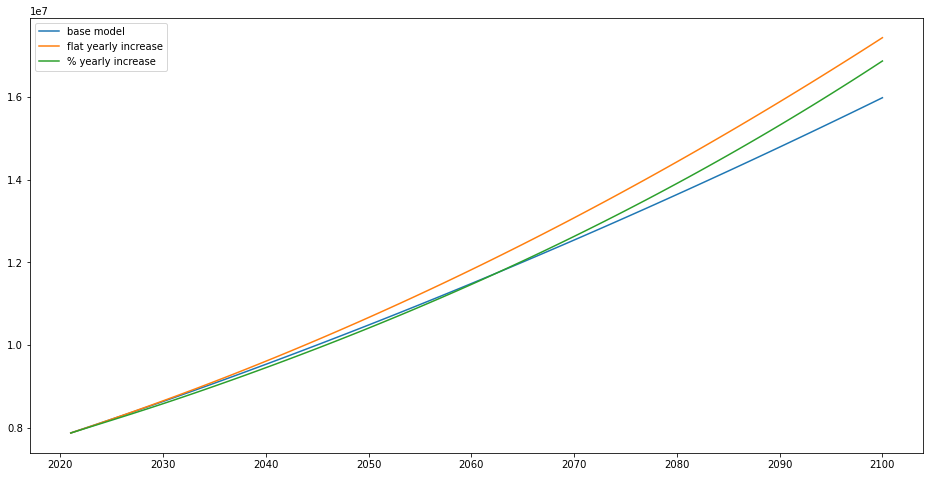

In [821]:
plt.plot(future['base'])
plt.plot(future['flat'])
plt.plot(future['%'])
plt.legend(['base model', 'flat yearly increase', '% yearly increase'])

### Using exog variables

In [822]:
exog = train_data[['deaths', 'life_expectancy']]
exogFuture = test_data[['deaths', 'life_expectancy']]

#baseline predict
fitSARIMA4 = SARIMAX(train_data['population'], exog = exog, order = (2, 2, 2)).fit()
start = len(train_data)
end = start + len(test_data) - 1
fcastSARIMA4 = fitSARIMA4.predict(start = start, end = end, exog = exogFuture, dynamic = False).rename('SARIMA 4')
print(mean_absolute_percentage_error(test_data['population'], fcastSARIMA4))

#predicting based on flat yearly increase
fitSARIMA5 = SARIMAX(train_data['Yearly change'], exog = exog,  order = (2, 2, 2)).fit()
fcastSARIMA5 = fitSARIMA5.predict(start = start, end = end, exog = exogFuture, dynamic = False).rename('SARIMA 5')
print(mean_absolute_percentage_error(test_data['Yearly change'], fcastSARIMA5))

#predicting based on % yearly increase
fitSARIMA6 = SARIMAX(train_data['%'], exog = exog, order = (2, 1, 2)).fit()
fcastSARIMA6 = fitSARIMA6.predict(start = start, end = end, exog = exogFuture, dynamic = False).rename('SARIMA 6')
print(mean_absolute_percentage_error(test_data['%'], fcastSARIMA6))

#back to total population
pred2 = np.array([fcastSARIMA5[0] + train_data['population'][-1]])
pred3 = np.array([(fcastSARIMA6[0] + 100) / 100 * train_data['population'][-1]])

for i in range(0, len(fcastSARIMA5) - 1):
    pred2 = np.append(pred2, pred2[i] + fcastSARIMA5[i + 1])
    pred3 = np.append(pred3, (fcastSARIMA6[i + 1] + 100) / 100 * pred3[i])

pred['flat_exog'] = pred2
pred['%_exog'] = pred3
pred['base_exog'] = fcastSARIMA4
print(pred)

0.0015633021955402035
7.675456906637446
0.048016499098564404
                    flat             %          base     flat_exog  \
2011-01-01  7.041263e+06  7.040200e+06  7.041490e+06  6.405438e+06   
2012-01-01  7.126080e+06  7.123950e+06  7.126764e+06  5.852012e+06   
2013-01-01  7.211279e+06  7.208183e+06  7.212643e+06  5.296548e+06   
2014-01-01  7.296858e+06  7.293032e+06  7.299125e+06  4.739127e+06   
2015-01-01  7.382817e+06  7.378629e+06  7.386208e+06  4.180166e+06   
2016-01-01  7.469156e+06  7.465092e+06  7.473891e+06  3.619570e+06   
2017-01-01  7.555877e+06  7.552517e+06  7.562172e+06  3.057440e+06   
2018-01-01  7.642976e+06  7.640976e+06  7.651048e+06  2.493951e+06   
2019-01-01  7.730457e+06  7.730518e+06  7.740518e+06  1.929104e+06   
2020-01-01  7.818317e+06  7.821173e+06  7.830580e+06  1.364378e+06   

                  %_exog     base_exog  
2011-01-01  7.040186e+06  7.041484e+06  
2012-01-01  7.123900e+06  7.126748e+06  
2013-01-01  7.208088e+06  7.212611e+06  
2014

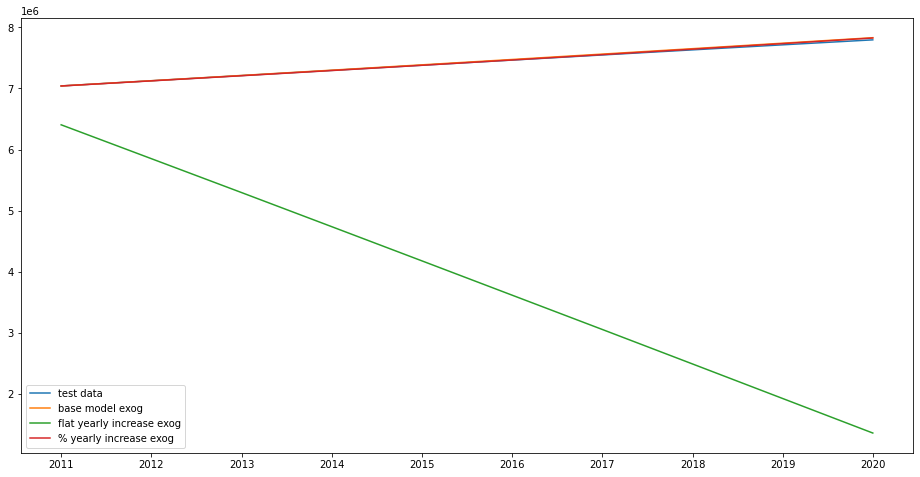

In [823]:
plt.plot(test_data['population'])
plt.plot(pred['base_exog'])
plt.plot(pred['flat_exog'])
plt.plot(pred['%_exog'])
plt.legend(['test data', 'base model exog', 'flat yearly increase exog', '% yearly increase exog'])

### Forecasting exog variables

In [824]:
auto_arima(population['life_expectancy'], seasonal = False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=104.223, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=97.605, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=102.223, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=92.189, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=90.919, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=53.244, Time=0.08 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=51.079, Time=0.11 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=50.382, Time=0.21 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=52.487, Time=0.10 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=52.629, Time=0.26 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=53.498, Time=0.17 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=48.695, Time=0.16 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=50.878, Time=0.06 sec
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(5, 2, 1)   Log Likelihood                 -17.348
Date:                Tue, 31 May 2022   AIC                             48.695
Time:                        18:47:13   BIC                             64.334
Sample:                             0   HQIC                            54.900
                                 - 71                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4209      0.070    -20.402      0.000      -1.557      -1.284
ar.L2         -1.2842      0.081    -15.883      0.000      -1.443      -1.126
ar.L3         -1.2368      0.123    -10.084      0.000      -1.477      -0.996
ar.L4         -1.2770      0.077    -16.514      0.000      -1.429      -1.125
ar.L5         -0.8031      0.028    -28.930      0.000      -0.858      -0.749
ma.L1          0.5953      0.078      7.650      0.000       0.443       0.748
sigma2         0.0891      0.008     11.007      0.000       0.073       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               247.18
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [825]:
auto_arima(population['births'], seasonal = False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=65.173, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=64.618, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=66.246, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=66.330, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=93.803, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=67.813, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.268 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -30.309
Date:                Tue, 31 May 2022   AIC                             64.618
Time:                        18:47:13   BIC                             69.114
Sample:                             0   HQIC                            66.404
                                 - 71                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2795      0.045     -6.256      0.000      -0.367      -0.192
sigma2         0.1392      0.015      9.525      0.000       0.111       0.168
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                30.17
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [826]:
auto_arima(population['deaths'], seasonal = False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=59.254, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=51.508, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=57.254, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=50.654, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=48.940, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=5.826, Time=0.08 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=6.216, Time=0.11 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=5.072, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=5.686, Time=0.23 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=5.496, Time=0.16 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=3.615, Time=0.25 sec
 ARIMA(5,2,3)(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(5, 2, 2)   Log Likelihood                   7.193
Date:                Tue, 31 May 2022   AIC                              3.615
Time:                        18:47:15   BIC                             23.722
Sample:                             0   HQIC                            11.592
                                 - 71                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0078      0.011      0.737      0.461      -0.013       0.029
ar.L1         -0.1794      0.306     -0.587      0.557      -0.779       0.420
ar.L2          0.0149      0.243      0.061      0.951      -0.461       0.491
ar.L3         -0.2350      0.185     -1.273      0.203      -0.597       0.127
ar.L4         -0.3880      0.192     -2.017      0.044      -0.765      -0.011
ar.L5          0.5661      0.270      2.100      0.036       0.038       1.094
ma.L1         -0.3688      0.358     -1.030      0.303      -1.070       0.333
ma.L2         -0.5303      0.159     -3.338      0.001      -0.842      -0.219
sigma2         0.0425      0.008      5.365      0.000       0.027       0.058
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):               350.95
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [827]:
birthsSARIMA = SARIMAX(population['births'], order = (2, 1, 0)).fit()
birthsSARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 births   No. Observations:                   71
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -35.394
Date:                Tue, 31 May 2022   AIC                             76.789
Time:                        18:47:15   BIC                             83.534
Sample:                    01-01-1950   HQIC                            79.468
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2660      0.088      3.032      0.002       0.094       0.438
ar.L2          0.3390      0.097      3.482      0.000       0.148       0.530
sigma2         0.1600      0.018      9.068      0.000       0.125       0.195
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                48.95
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### (2, 1, 0) is better

In [828]:
#life expectancy
lifeSARIMA = SARIMAX(train_data['life_expectancy'], order = (5, 2, 1)).fit()
start = len(train_data)
end = start + len(test_data) - 1
fcastLife = lifeSARIMA.predict(start = start, end = end, dynamic = False).rename('life SARIMA')
print(mean_absolute_percentage_error(test_data['life_expectancy'], fcastLife))

#births
birthsSARIMA = SARIMAX(train_data['births'], order = (2, 1, 0)).fit()
fcastbirths = birthsSARIMA.predict(start = start, end = end, dynamic = False).rename('births SARIMA')
print(mean_absolute_percentage_error(test_data['births'], fcastbirths))

#deaths
deathsSARIMA = SARIMAX(train_data['deaths'], order = (5, 2, 2)).fit()
fcastdeaths = deathsSARIMA.predict(start = start, end = end, dynamic = False).rename('deaths SARIMA')
print(mean_absolute_percentage_error(test_data['deaths'], fcastdeaths))


pred['life_expectancy'] = fcastLife
pred['births'] = fcastbirths
pred['deaths'] = fcastdeaths

0.004655216172505227
0.03774538613077595
0.0228138588145491


In [829]:
#life expectancy
lifeSARIMA = SARIMAX(population['life_expectancy'], order = (5, 2, 1)).fit()
start = len(population)
end = start + 79
fcastLife = lifeSARIMA.predict(start = start, end = end, dynamic = False).rename('life SARIMA')

#births
birthsSARIMA = SARIMAX(population['births'], order = (2, 1, 0)).fit()
fcastbirths = birthsSARIMA.predict(start = start, end = end, dynamic = False).rename('births SARIMA')

#deaths
deathsSARIMA = SARIMAX(population['deaths'], order = (5, 2, 2)).fit()
fcastdeaths = deathsSARIMA.predict(start = start, end = end, dynamic = False).rename('deaths SARIMA')


future['life_expectancy'] = fcastLife
future['births'] = fcastbirths
future['deaths'] = fcastdeaths

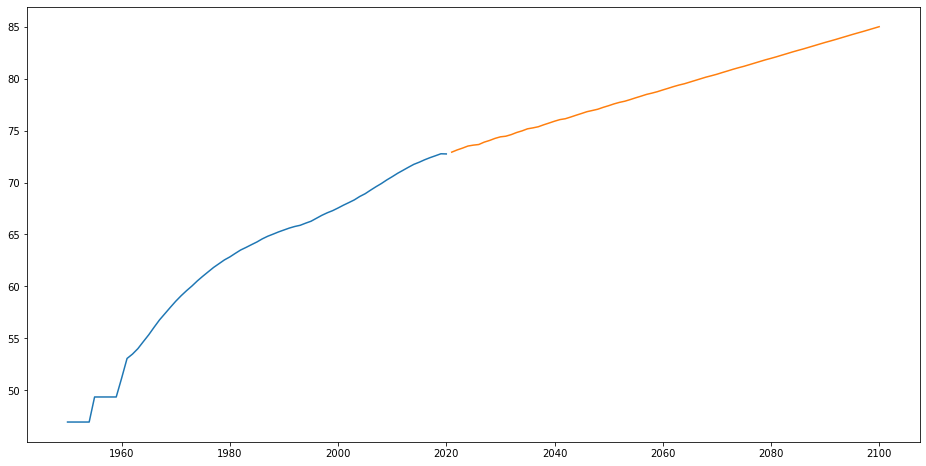

In [830]:
plt.plot(population['life_expectancy'])
plt.plot(future['life_expectancy'])

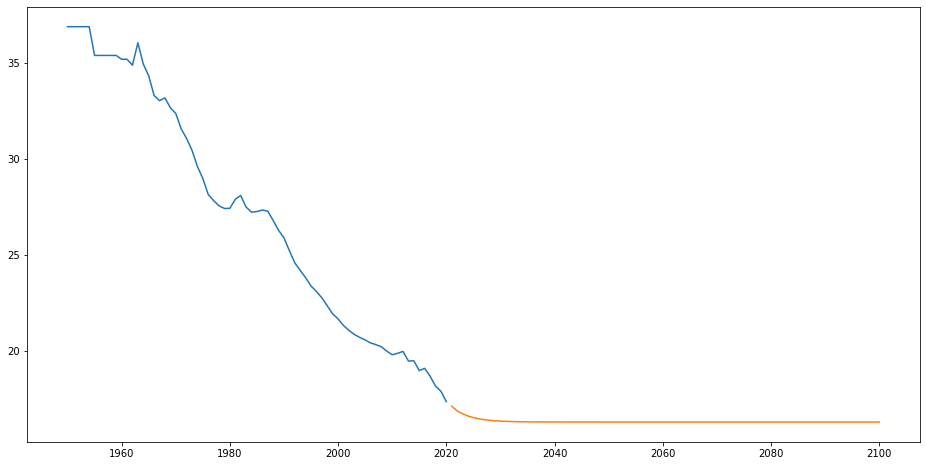

In [831]:
plt.plot(population['births'])
plt.plot(future['births'])

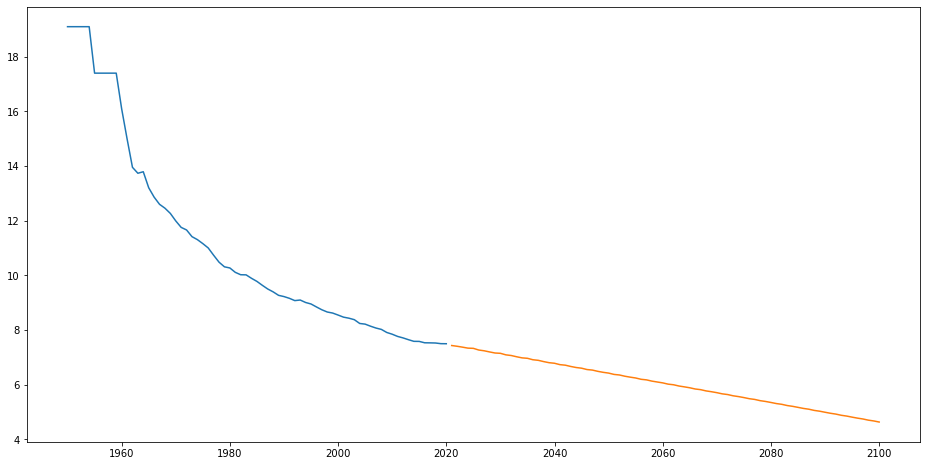

In [832]:
plt.plot(population['deaths'])
plt.plot(future['deaths'])

### Back to forecasting population

In [833]:
#baseline predict
exog = population[['deaths', 'life_expectancy']]
exogFuture = future[['deaths', 'life_expectancy']]

fitSARIMA4 = SARIMAX(population['population'], exog = exog, order = (2, 2, 2)).fit()
start = len(population)
end = start + 79
fcastSARIMA4 = fitSARIMA4.predict(start = start, end = end, exog = exogFuture, dynamic = False).rename('SARIMA 4')

#predicting based on flat yearly increase
fitSARIMA5 = SARIMAX(population['Yearly change'], exog = exog,  order = (2, 2, 2)).fit()
fcastSARIMA5 = fitSARIMA5.predict(start = start, end = end, exog = exogFuture, dynamic = False).rename('SARIMA 5')

#predicting based on % yearly increase
fitSARIMA6 = SARIMAX(population['%'], exog = exog, order = (2, 1, 2)).fit()
fcastSARIMA6 = fitSARIMA6.predict(start = start, end = end, exog = exogFuture, dynamic = False).rename('SARIMA 6')

#back to total population
pred2 = np.array([fcastSARIMA5[0] + population['population'][-1]])
pred3 = np.array([(fcastSARIMA6[0] + 100) / 100 * population['population'][-1]])

for i in range(0, len(fcastSARIMA5) - 1):
    pred2 = np.append(pred2, pred2[i] + fcastSARIMA5[i + 1])
    pred3 = np.append(pred3, (fcastSARIMA6[i + 1] + 100) / 100 * pred3[i])

future['flat_exog'] = pred2
future['%_exog'] = pred3
future['base_exog'] = fcastSARIMA4
future

c:\Users\Rudy\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,flat,%,base,life_expectancy,births,deaths,flat_exog,%_exog,base_exog
2021-01-01,7.876118e+06,7.874231e+06,7.876686e+06,72.918057,17.097762,7.434450,7.875137e+06,7.874274e+06,7.876106e+06
2022-01-01,7.958463e+06,7.952756e+06,7.959128e+06,73.130914,16.850407,7.407123,7.954535e+06,7.952972e+06,7.957330e+06
2023-01-01,8.041910e+06,8.030672e+06,8.042125e+06,73.307741,16.704442,7.374611,8.032960e+06,8.031311e+06,8.038508e+06
2024-01-01,8.126362e+06,8.108336e+06,8.125675e+06,73.507170,16.581753,7.338983,8.110424e+06,8.109805e+06,8.119587e+06
2025-01-01,8.211790e+06,8.186107e+06,8.209776e+06,73.594885,16.499630,7.331263,8.186874e+06,8.188965e+06,8.200617e+06
...,...,...,...,...,...,...,...,...,...
2096-01-01,1.679867e+07,1.622864e+07,1.549691e+07,84.378773,16.268509,4.777469,1.109275e+07,1.675446e+07,1.377434e+07
2097-01-01,1.695513e+07,1.638596e+07,1.561684e+07,84.524555,16.268509,4.746503,1.109849e+07,1.692464e+07,1.385034e+07
2098-01-01,1.711258e+07,1.654480e+07,1.573722e+07,84.678241,16.268509,4.703921,1.110326e+07,1.709656e+07,1.392625e+07
2099-01-01,1.727101e+07,1.670519e+07,1.585804e+07,84.832462,16.268509,4.674745,1.110707e+07,1.727023e+07,1.400211e+07


### Prophet

In [835]:
from prophet import Prophet

population.index.name = 'Date'
data = population.reset_index()[['Date', '%']].dropna()
data.columns = ['ds', 'y']
fitProphet = Prophet()
fitProphet.fit(data)
futureProphet = fitProphet.make_future_dataframe(80, freq = 'YS')
fcastProphet = fitProphet.predict(futureProphet)

#going back to normal dataframe from prophet
prophetForecast = fcastProphet[['ds', 'yhat']].iloc[-80:]
prophetForecast.set_index('ds', inplace = True)
prophetForecast.index.name = 'Date'
prophetForecast.columns = ['%']

fcastProphet = np.array([(prophetForecast['%'][0] + 100) / 100 * population['population'][-1]])

for i in range(0, len(prophetForecast) - 1):
    fcastProphet = np.append(fcastProphet, (prophetForecast['%'][i + 1] + 100) / 100 * fcastProphet[i])

future['prophet'] = fcastProphet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,%
Date,
2021-01-01,1.021159
2022-01-01,1.008560
2023-01-01,0.994767
2024-01-01,0.979775
2025-01-01,0.959099
...,...
2096-01-01,-0.137297
2097-01-01,-0.157973
2098-01-01,-0.170572


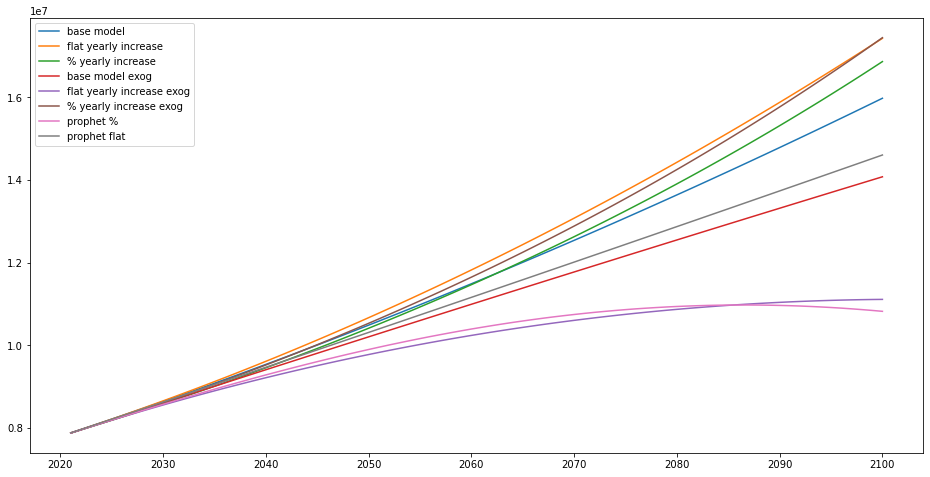

In [841]:
plt.plot(future['base'])
plt.plot(future['flat'])
plt.plot(future['%'])
plt.plot(future['base_exog'])
plt.plot(future['flat_exog'])
plt.plot(future['%_exog'])
plt.plot(future['prophet'])
plt.legend(['base model', 'flat yearly increase', '% yearly increase', 'base model exog', 'flat yearly increase exog', '% yearly increase exog', 'prophet %'])